# Classifying spectra using a *Convolutional Neural Network* (CNN) 

1. **Defining the input parameters**
2. **Loading the training and testing data set**
3. **Setting up the architecture for neural network**
4. **Train the network** <br>
    4.1 **Plot the loss and accuracy curve for CNN**
5. **Evaluate the result on the testing data set**

**Data**: 02nd Dec 2019<br>
**Author**: Soumya Shreeram<br>
**Guidance from**: Schäfer Christoph E. Rerné<br>
**Script adapted from**: S. Ben Nejma

In [48]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})
from sklearn.metrics import confusion_matrix
import pickle
import os

Loading the machine learning packages `tensorflow` and `keras`.

In [2]:
import tensorflow as tf
import keras
from keras.models import Sequential, load_model
from keras.layers import (Dense, Conv1D, MaxPooling1D, AveragePooling1D,
                          Dropout, Flatten, BatchNormalization)
from keras import optimizers
from keras import regularizers
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


## 1. Defining the input parameters 

In [71]:
# code parameters used further
epochs = 15
batch_size = 30 
verbrose = 2    # degree of info. outputted during training
learning_rate=0.001
momentum = 0.0

# directory to save model
save_model_dir = 'Algos/NN_folder/CNN'

# do you want to reuse a previously trained model?
reuse = False

## 2. Loading the training and testing data sets

In [72]:
def loadTrainingTestingData(data_names):
    X_train = np.load("Data_files/"+data_names[0]+".npy", mmap_mode='r')
    Y_train = np.load("Data_files/"+data_names[1]+".npy", mmap_mode='r')
    X_test = np.load("Data_files/"+data_names[2]+".npy", mmap_mode='r')
    Y_test = np.load("Data_files/"+data_names[3]+".npy", mmap_mode='r')
    return X_train, Y_train, X_test, Y_test

def processTrainTestSets(data_sets):
    """
    Function 1) Converts the Y-vectors of intergers to a binary matrix
             2) Reshapes the X-vectors to 1 channel samples
    """
    # converts the vectors of intergers to a binary matrix
    Y_train = keras.utils.to_categorical(data_sets[1])
    Y_test = keras.utils.to_categorical(data_sets[3])

    # reshaping the X-vectors
    train_shape = (data_sets[0].shape[0], data_sets[0].shape[1], 1)
    test_shape = (data_sets[2].shape[0], data_sets[2].shape[1], 1)
    
    X_train = data_sets[0].reshape(train_shape)
    X_test = data_sets[2].reshape(test_shape)
    return X_train, Y_train, X_test, Y_test

In [73]:
# reading the data
data_names = ['X_train', 'Y_train', 'X_test', 'Y_test']

X_train, Y_train, X_test, Y_test = loadTrainingTestingData(data_names)
data_sets = [X_train, Y_train, X_test, Y_test]

# converting Y-vectors to a binary matrix and reshaping the X-vectors
X_train, Y_train, X_test, Y_test = processTrainTestSets(data_sets)
data_sets = [X_train, Y_train, X_test, Y_test]

# print shape of training and testing data sets
for i in range(len(data_names)):
               print(data_names[i],'=', np.shape(data_sets[i]))

X_train = (553301, 4317, 1)
Y_train = (553301, 3)
X_test = (237130, 4317, 1)
Y_test = (237130, 3)


## 3. Setting up the architecture for the neural network

<img src="Images/Convolutional_neural_network.jpg" alt="FCNN" width="650"/> <br>
Figure shows the typical architecture of a convolutional neural network. <br> <br>

Training the data set implies that we are trying to optimize the loss function. 

* *Optimizer*: The optimizer chosen here is the Stochastic gradient descent optimizer (SGD); the list of other optimizers can be found [here](https://keras.io/optimizers/). 

* *Loss function*: Here, 'Cross entropy' is a method to define this loss function. 

In [74]:
def reuseModel(save_model_dir):
    """
    Function loads a previously trained model
    """
    with open(save_model_dir+'_history.pkl', 'rb') as filehandler:
            history = pickle.load(filehandler)
    return load_model(save_model_dir+'.h5')

def modelArchitecture():
    """
    Function designs the architecture of the training model by setting the activation functions, no. of layers, neurons per layer, etc
    """
    model = Sequential()
    model.add(AveragePooling1D(pool_size=5))
    model.add(Conv1D(16, 3, activation='relu'))
    model.add(Conv1D(32, 3, activation='relu'))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    return model

def buildCompileModel(learning_rate, momentum):
    """
    Function brings together the built model, defines the optimizers and compiles the model 
    """
    # build model
    model = modelArchitecture()

    # optimizer 
    sgd = optimizers.SGD(lr=learning_rate, momentum=momentum, nesterov=False)

    # compilation for a multi-category classification problem
    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [75]:
if reuse:
    model = reuseModel(save_model_dir)
else:    
    model = buildCompileModel(learning_rate, momentum)

## 4. Train the network

The **`model.fit()`** fits the model to the data for the desired number of **`epochs`** (a pass through the entire training set), **`batch_size`** (number of training sample propogated at once through the network), and **`verbrose`** (degree of information printed out while training). 

In [76]:
model_history = model.fit(X_train, Y_train,
                                  epochs=epochs, batch_size=batch_size,
                                  validation_data=(X_test, Y_test),
                                  verbose=verbrose)

Train on 553301 samples, validate on 237130 samples
Epoch 1/15
 - 186s - loss: 0.3314 - accuracy: 0.8975 - val_loss: 0.2338 - val_accuracy: 0.9315
Epoch 2/15
 - 180s - loss: 0.2198 - accuracy: 0.9355 - val_loss: 0.1761 - val_accuracy: 0.9447
Epoch 3/15
 - 181s - loss: 0.1700 - accuracy: 0.9484 - val_loss: 0.1605 - val_accuracy: 0.9509
Epoch 4/15
 - 182s - loss: 0.1460 - accuracy: 0.9558 - val_loss: 0.1373 - val_accuracy: 0.9591
Epoch 5/15
 - 182s - loss: 0.1337 - accuracy: 0.9600 - val_loss: 0.1553 - val_accuracy: 0.9544
Epoch 6/15
 - 160s - loss: 0.1258 - accuracy: 0.9629 - val_loss: 0.1242 - val_accuracy: 0.9637
Epoch 7/15
 - 159s - loss: 0.1129 - accuracy: 0.9661 - val_loss: 0.1068 - val_accuracy: 0.9683
Epoch 8/15
 - 159s - loss: 0.1055 - accuracy: 0.9686 - val_loss: 0.1024 - val_accuracy: 0.9698
Epoch 9/15
 - 160s - loss: 0.0982 - accuracy: 0.9706 - val_loss: 0.1025 - val_accuracy: 0.9698
Epoch 10/15
 - 159s - loss: 0.0965 - accuracy: 0.9713 - val_loss: 0.0991 - val_accuracy: 0.96

### 4.1 Plot of the loss and accuracy curve for NN1

In [84]:
def setLabels(ax, xlabel, ylabel, ticks, legend):
    """
    Function sets the axes labels, legent size, and ticks
    """
    ax.set_xlabel(xlabel, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=20)
    if legend:
        ax.legend(loc='center right', fontsize=18)
    ax.grid()
    if ticks:
        ax.tick_params(which='both', labelsize=18)
    return

def plotLoss(ax, loss_Accuracy, labels):
    """
    Function plots the loss curve for training run of x epochs
    """
    ax.plot(history[loss_Accuracy[0]], '#00a15b', lw=2, label=labels[0])
    ax.plot(history[loss_Accuracy[1]], '#fc5400', lw=2, label=labels[1])
    ax.set_title('Loss curve for CNN\n')
    setLabels(ax, 'Epoch', r'$\mathcal{L}\ \equiv$ Categorical cross entropy', ticks=True, legend=True)
    return

def plotAccuracy(ax, loss_Accuracy, labels):
    """
    Function plots the accuracy curve for training run of x epochs
    """
    ax.plot(history[loss_Accuracy[2]],  '#00a15b', lw=2, label=labels[0])
    ax.plot(history[loss_Accuracy[3]], '#fc5400', lw=2, label=labels[1])
    ax.set_title('Accuracy curve for CNN\n')
    setLabels(ax, 'Epoch', 'Accuracy', ticks=True, legend=True)
    return

The loss and accuracy curves are plotted for NN1 for epochs. 

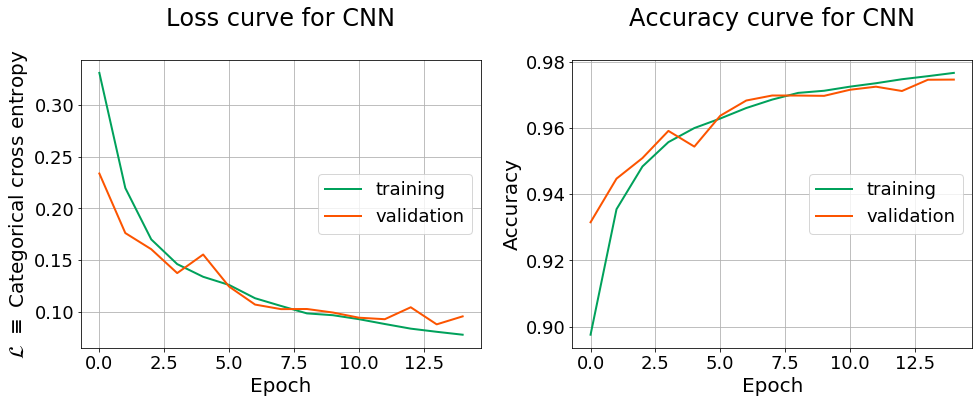

In [85]:
# logs the history of the run
history = model_history.history

# plots the history
fig, ax = plt.subplots(1,2, figsize=(14,6))
labels = ['training', 'validation']
loss_Accuracy = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plotLoss(ax[0], loss_Accuracy, labels)
plotAccuracy(ax[1], loss_Accuracy, labels)
 
fig.savefig('Images/LandA_CNN.png')    
fig.tight_layout()

## 5. Evaluate the result on the testing data set

Once we have trained the model to make predictions on the data, we evaluate it's performance on the test data set.

In [79]:
def printScore(model, X_test, Y_test):
    """
    Function prints the loss and accuracy percents of the model by comparison with the test data set
    Returns:
    score[0]:: loss percentage
    score[1]:: accuracy percentage
    """
    score = model.evaluate(X_test, Y_test,verbose=2)
    print('\nLoss = %.2f percent, Accuracy = %.2f percent'%(score[0]*100, score[1]*100))
    return score[0], score[1]

def saveModel(history, save_model_dir):
    """
    Function to save the model and it's history
    """
    model.save(save_model_dir+'.h5')
    
    with open(save_model_dir+'_history.pkl', 'wb') as filehandler:
        pickle.dump(history, filehandler)
    print('\nModel saved')
    return

In [80]:
# predictions made on the test data set
printScore(model, X_test, Y_test)
saveModel(history, save_model_dir)


Loss = 9.54 percent, Accuracy = 97.47 percent

Model saved


### 5.1 Computes the confusion matrix

It is a table that describes the performance of the classifier when compared to the test set data. 

In [81]:
def computeConfusionMatrix(model, X_test, Y_test):
    """
    Function prints the confusion matrix for the trained classifier/model
    @param model :: trained model
    @param X,Y_test :: array containing the X,Y test data sets
    """
    # need to recover the Y_pred from the one-hot encoded array
    X_pred = model.predict(X_test)
    Y_pred = np.argmax(X_pred, axis=1)
    
    # calculates the matrix by comparison
    confusion_mat = confusion_matrix(Y_test.argmax(axis=1), Y_pred)
    normalization = np.sum(confusion_mat, axis=1, keepdims=True)
    
    confusion_mat = confusion_mat/normalization
    print(confusion_mat)
    return confusion_mat

In [82]:
confusion_mat = computeConfusionMatrix(model, X_test, Y_test)

[[0.95732002 0.04028298 0.002397  ]
 [0.01149516 0.98486068 0.00364417]
 [0.00780734 0.03899537 0.95319729]]


## 6. Find optimal values for model parameters

The following snippet of code aims to compute the optimal values for the model parameters:
* **Batch size**: size at which data is sent into the network
* **Epoch**: a complete iteration over all batches
* **Learning rate**: rate which the weights are updated during training
* **Momentum**: amount that smooths the progressions of the learning algorithm

The <u>metric</u> for evaluating the optimal values are the loss and accuracy percentages for every epoch of training and validation.

Note: `l&a` $\equiv$ loss and accuracy, `t&v` $\equiv$ training and validation.

In [10]:
# among these values for the parameters the "optimal" combination is chosen
batch_sz_arr = [30, 40, 50]
epochs_arr = [15, 30, 40]
learn_rt_arr = [0.001, 0.01, 0.1, 0.0001]
momentum_arr = [0.0, 0.5, 0.9]

**Notes on choice of parameters:**
* batch-size of size $20$ was tried, but did not converge for `(e,lr,m)` $\equiv$ `(15, 0.001, 0.0)`. This set the lower bound for the batch-size as $20$. 
* learning rate of $0.1$ resulted in overfitting, hence, was discarded. The optimal value for learning rate, with `(bs, e, m)` $\equiv$ `(30, 15, 0.0)`, is $0.001$. Note that $0.0001$ resulted in a good fit, however it did not achieve high accuracy values compared with $0.001$.


where `(bs,e,lr,m)` $\equiv$ (batch-size, epochs, learning-rate, momentum)

In [11]:
def computeOptimalParams(batch_size, epochs, learning_rate, momentum, data_set): 
    """
    Function computes the loss and accuracy for the given set of input parameters 
    @batch_size, epoch, learning_rate, momentum
    
    Returns:
    @loss_arr :: loss for every epoch for training and validation cases
    @accuracy_arr :: accuracy for every epoch for the training and validation cases
    """
    # builds and compiles the model
    model = buildCompileModel(learning_rate, momentum)
    
    # trains the model
    model_history = model.fit(data_sets[0], data_sets[1], epochs=epochs, batch_size=batch_size, validation_data=(data_sets[2],data_sets[3]), verbose=verbrose)
    print('Model trained')
    
    # logs the history of the run with the train, test curves
    history = model_history.history
    loss_arr = [history['loss'], history['val_loss']]
    accuracy_arr = [history['accuracy'], history['val_accuracy']]
    return loss_arr, accuracy_arr

def appendLossAccValues(loss_accuracy, loss_arr, accuracy_arr):
    """
    Function that appends the values for the 'loss & accuracy' (l&a) for 'train & validation' (t&v)for every epoch
    @Input loss_acc :: contains 4-columns with the l&a values for t&v
    @loss_arr :: 2-columns with loss values for t&v
    @accuracy_arr :: 2-columns with accuracy values for t&v
    
    @Returns :: 4-column updated `loss_accuracy` array
    """
    # append training values
    loss_accuracy[0] = np.append(loss_accuracy[0], [loss_arr[0]], axis=0)
    loss_accuracy[1] = np.append(loss_accuracy[1], [accuracy_arr[0]], axis=0)
    
    # append validation values
    loss_accuracy[2] = np.append(loss_accuracy[2], [loss_arr[1]], axis=0)
    loss_accuracy[3] = np.append(loss_accuracy[3], [accuracy_arr[1]], axis=0)
    
    return loss_accuracy

def prepareArrrays(epochs):
    """
    Function to prepare arrays of size = # of epochs
    """
    loss_train, accuracy_train = np.empty((0, epochs)), np.empty((0, epochs))
    loss_valid, accuracy_valid = np.empty((0, epochs)), np.empty((0, epochs))
    return [loss_train, accuracy_train, loss_valid, accuracy_valid]

### 6.1 Varying batch-size

In [ ]:
# preparing empty arrays
loss_accu_bs = prepareArrrays(epochs_arr[0])

for batch_sz in batch_sz_arr:
    # computing l&a for every 'batch_sz' in the 'batch_sz_arr'
    loss_arr, accuracy_arr = computeOptimalParams(batch_sz, epochs_arr[0], learn_rt_arr[0], momentum_arr[0], data_sets)
      
    # appends loss and accuracy values for every t&v cases
    loss_accu_bs = appendLossAccValues(loss_accu_bs, loss_arr, accuracy_arr)

#### 6.1.1 Plotting the loss and accuracy curves for various batch-sizes

In [13]:
def plotCurves(list_idx, ax, loss_accu_bs_arr, line_style, color, param_arr, ylabel, legend_idx, type_):
    """
    Function plots the loss curves for t&v for varying set of parameters
    @list_idx :: int array whose length = # of batch-size params tried
    @line_style, param_arr, ylabel :: plotting accesories, and labels for plot
    @legend_idx :: selects the legend label
    @loss_accu_bs_arr :: array with the t&v curves for every set of trial parameters    
    """
    labels = ['batch size=%d', 'learning rate=%0.4f', 'momentum=%0.1f', 'epochs=%d']
    for i in list_idx:
        if type_ == 'train':
            ax.plot(loss_accu_bs_arr[i],  color, linestyle=line_style[i], lw=2, label=labels[legend_idx]%param_arr[i])
            setLabels(ax, 'Epoch', ylabel+' (%)', ticks=True, legend=True)
            ax.legend(loc='best')
        elif type_ == 'test':
            ax.plot(loss_accu_bs_arr[i],  color, linestyle=line_style[i], lw=2, label=param_arr[i])
            setLabels(ax, 'Epoch', ylabel+' (%)', ticks=True, legend=False)   
    return

def varyingParamsPlot(idx, ax, loss_accu, param_arr, colr, legend_idx):
    """
    Function plots the loss and accuracy curves  (both t&v) for every element of param_arr
    @loss_accu :: 3-D array containing the l&a values for every element of param_arr
    @param_arr :: paramter array used to see the effect on l&a curves
    @idx :: index array == len(param_arr)
    """
    # plot-accesories
    line_style = ['-', '--', ':', '-.']
    
    # t&v -loss curves
    plotCurves(idx, ax[0], loss_accu[0], line_style, colr,param_arr,'Loss',legend_idx,'train')
    plotCurves(idx, ax[0], loss_accu[2],line_style, '#6c6d70',param_arr,'Loss',legend_idx,'test')

    # t&v - accuracy curves
    plotCurves(idx, ax[1], loss_accu[1],line_style, colr, param_arr,'Accuracy',legend_idx,'train')
    plotCurves(idx, ax[1], loss_accu[3],line_style, '#6c6d70', param_arr,'Accuracy',legend_idx,'test')
    return

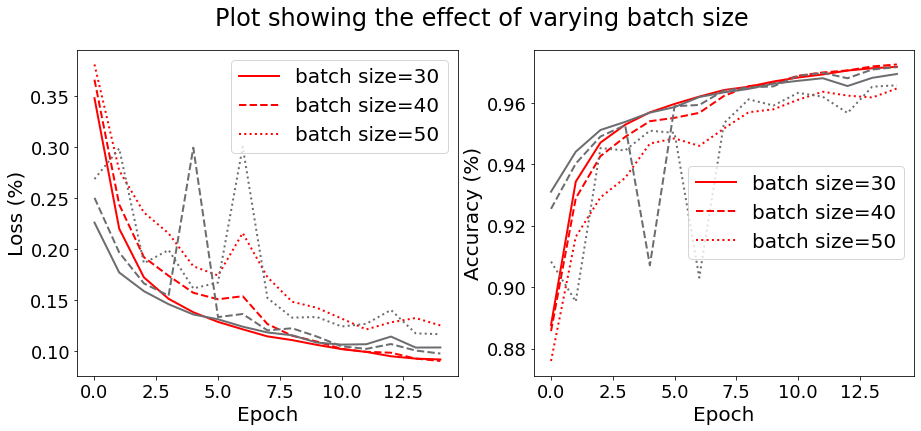

In [133]:
fig, ax = plt.subplots(1,2, figsize=(15,6))

# len(idx) = number of attempts to vary parameters
idx = [0, 1, 2]

# plotting the effect of varying batch-size
varyingParamsPlot(idx, ax, loss_accu_bs, batch_sz_arr, 'r', legend_idx=0)

fig.suptitle('Plot showing the effect of varying batch size')
fig.savefig('Images/Varying_bs.png')

In [116]:
np.save('Data_files/Varying_bs_CNN.npy',loss_accu_bs)

### 6.2 Varying learning rate

In [ ]:
# preparing empty arrays
loss_accu_lr = prepareArrrays(epochs_arr[0])

for learn_rt in learn_rt_arr:
    # computing l&a for every 'learn_rt' in the 'learn_rt_arr'
    loss_arr, accuracy_arr = computeOptimalParams(batch_sz_arr[0], epochs_arr[0], learn_rt, momentum_arr[0], data_sets)
      
    # appends loss and accuracy values for every t&v cases
    loss_accu_lr = appendLossAccValues(loss_accu_lr, loss_arr, accuracy_arr)

#### 6.2.1 Plotting the loss and accuracy curves for various learning-rates

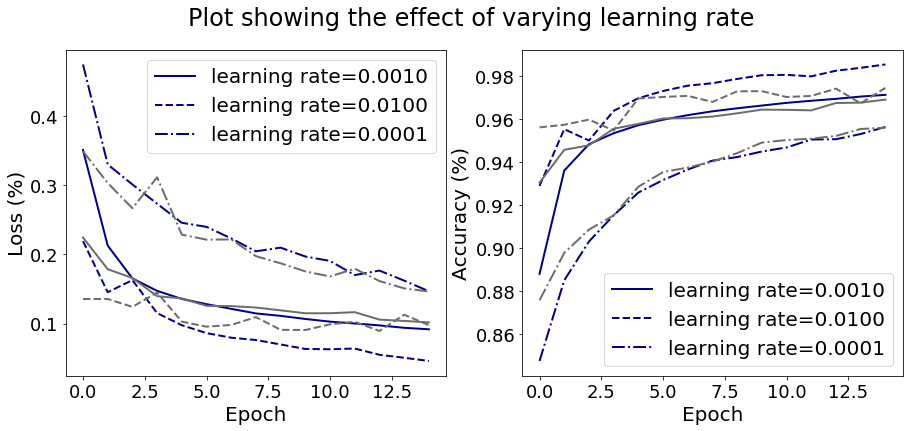

In [139]:
fig, ax = plt.subplots(1,2, figsize=(15,6))

# len(idx) = number of attempts to vary parameters
idx = [0, 1, 3]

# plotting the effect of varying batch-size
varyingParamsPlot(idx, ax, loss_accu_lr, learn_rt_arr, '#00008b', legend_idx=1)

fig.suptitle('Plot showing the effect of varying learning rate')
fig.savefig('Images/Varying_lr.png')

In [140]:
np.save('Data_files/Varying_lr_CNN.npy',loss_accu_lr)

### 6.3 Varying momentum

In [ ]:
# preparing empty arrays
loss_accu_m = prepareArrrays(epochs_arr[0])

for momentum in momentum_arr:
    # computing l&a for every 'momentum' in the 'momentum_arr'
    loss_arr, accuracy_arr = computeOptimalParams(batch_sz_arr[0], epochs_arr[0], learn_rt_arr[0], momentum, data_sets)
      
    # appends loss and accuracy values for every t&v cases
    loss_accu_m = appendLossAccValues(loss_accu_m, loss_arr, accuracy_arr)

In [23]:
np.save('Data_files/Varying_m_CNN.npy',loss_accu_m)

#### 6.3.1 Plotting the loss and accuracy curves for various learning-rates

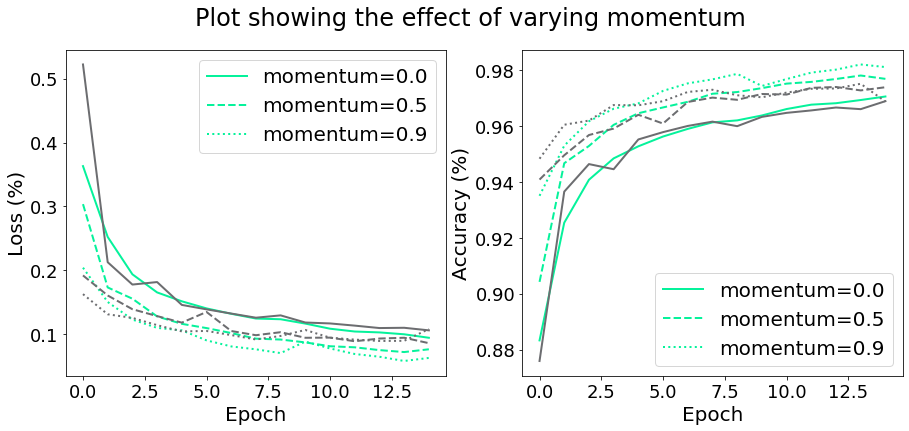

In [20]:
fig, ax = plt.subplots(1,2, figsize=(15,6))

# len(idx) = number of attempts to vary parameters
idx = [0, 1, 2]

# plotting the effect of varying batch-size
varyingParamsPlot(idx, ax, loss_accu_m, momentum_arr,'#05f29b', legend_idx=2)

fig.suptitle('Plot showing the effect of varying momentum')
fig.savefig('Images/Varying_m.png')

### 6.4 Varying epochs

In [ ]:
s = ["one","two", "three"]

for i,epochs in enumerate(epochs_arr[1:]):
    # preparing empty arrays
    exec("loss_accu_e%s = prepareArrrays(epochs_arr[0])"%(s[i]))
    
    # computing l&a for every 'epochs' in the 'epochs_arr'
    loss_arr, accuracy_arr = computeOptimalParams(batch_sz_arr[0], epochs, learn_rt_arr[0], momentum_arr[0], data_sets)
      
    # appends loss and accuracy values for every t&v cases
    exec("loss_accu_e%s=[loss_arr, accuracy_arr]"%(s[i]))

In [22]:
np.save('Data_files/Varying_ei_CNN.npy',loss_accu_eone)
np.save('Data_files/Varying_eii_CNN.npy',loss_accu_etwo)
np.save('Data_files/Varying_eiii_CNN.npy',loss_accu_ethree)

In [50]:
def plotEpochs(ax, loss_accu_e, line_style, epochs_arr): 
    """
    Function plots the l&a curves for various epoch values
    """
    # t&v - loss curves
    ax[0].plot(loss_accu_e[0][0], '#fc5603', linestyle=line_style, lw=2,label='epochs=%d'%epochs_arr)
    ax[0].plot(loss_accu_e[0][1],'#6c6d70',linestyle=line_style, lw=2)

    # t&v - accuracy curves
    ax[1].plot(loss_accu_e[1][0],'#fc5603',linestyle=line_style, lw=2,label='epochs=%d'%epochs_arr)
    ax[1].plot(loss_accu_e[1][1], '#6c6d70',linestyle=line_style, lw=2)    
    
    # sets labels for the two plots
    setLabels(ax[0], 'Epoch', 'Loss', ticks=True, legend=True)
    setLabels(ax[1], 'Epoch', 'Accuracy', ticks=True, legend=True)
    return

def readEpochsData():
    """
    Function reading the data of the trained models, for all attempted epochs
    """
    la_i = np.load('Data_files/Varying_ei_CNN.npy', mmap_mode='r')
    la_ii = np.load('Data_files/Varying_eii_CNN.npy', mmap_mode='r')
    la_iii = np.load('Data_files/Varying_eiii_CNN.npy', mmap_mode='r')
    return [la_i, la_ii, la_iii]


#### 6.4.1 Plotting the loss and accuracy curves for various epochs

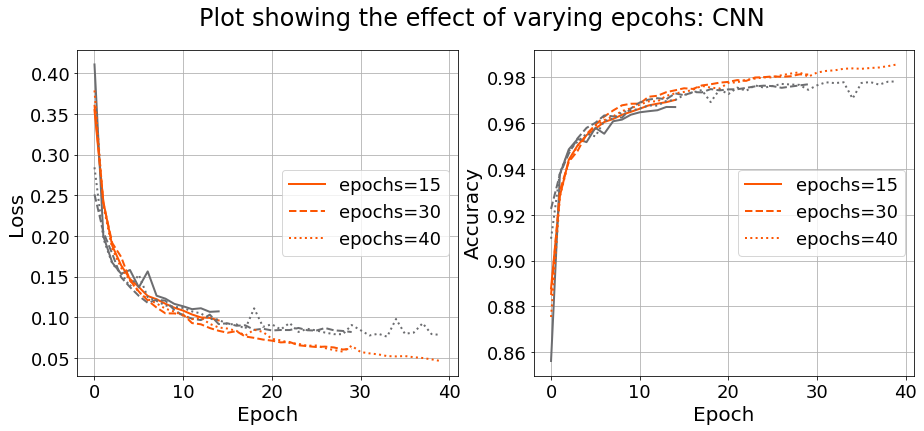

In [51]:
fig, ax = plt.subplots(1,2, figsize=(15,6))

loss_accu_e = readEpochsData()
line_style = ['-', '--', ':', '-.']
    
for i in [0,1,2]:    
    plotEpochs(ax, loss_accu_e[i], line_style[i], epochs_arr[i])
    
fig.suptitle('Plot showing the effect of varying epcohs: CNN')
fig.savefig('Images/Varying_e.png')